In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Path to your training log
log_path = "/home/calvin/code/cmpnn_revised/scripts/lightning_logs/version_6/depth_loss_log.json"  # Replace this
with open(log_path, 'r') as f:
    logs = json.load(f)

In [9]:
df = pd.DataFrame(logs)
df

,depth,loss
0,4,16.080536
1,4,24.259342
2,4,18.325600
3,3,18.162848
4,3,19.762318
...,...,...
1695,3,2.465738
1696,4,2.322156
1697,2,3.253319
1698,2,3.346491


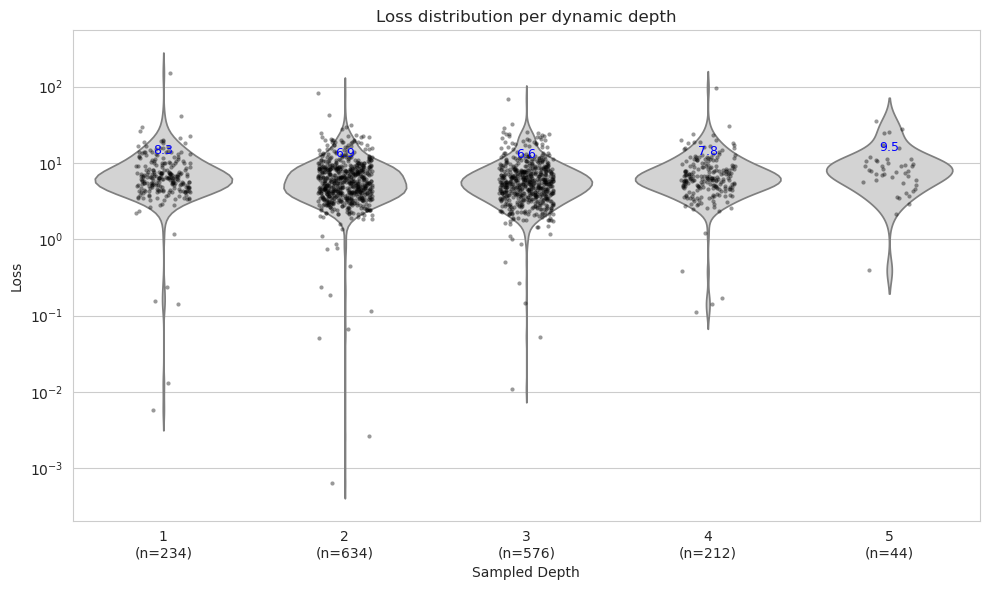

Saved enhanced plot to /home/calvin/code/cmpnn_revised/scripts/lightning_logs/version_6/depth_loss_plot_enhanced.png


In [10]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Log scale for better visualization
plt.yscale("log")

# Draw violin plot with overlaid strip
sns.violinplot(x='depth', y='loss', data=df, inner=None, color='lightgray')
sns.stripplot(x='depth', y='loss', data=df, color='black', size=3, alpha=0.4, jitter=0.15)

depth_counts = df['depth'].value_counts().sort_index()
plt.xticks(ticks=range(len(depth_counts)),
           labels=[f'{d}\n(n={c})' for d, c in depth_counts.items()])

for d, group in df.groupby('depth'):
    y_mean = group['loss'].mean()
    plt.text(d - 1, y_mean + 5, f'{y_mean:.1f}', ha='center', fontsize=9, color='blue')


plt.title("Loss distribution per dynamic depth")
plt.xlabel("Sampled Depth")
plt.ylabel("Loss")

plot_path = os.path.join(os.path.dirname(log_path), "depth_loss_plot_enhanced.png")
plt.tight_layout()
plt.savefig(plot_path)
plt.show()

print(f"Saved enhanced plot to {plot_path}")